In [7]:
import time
#数据清洗函数
def dataPre(data,names,meanVals,if_user=True):
    for idx,name in enumerate(names):
        if name=='content':
            dataPreCon(data,meanVals[idx])
        elif name=='create_time':
            dataPreTime(data,meanVals[idx])
        elif name in ['comment_count','love_count']:
            dataPreVal(data,name,meanVals[idx])
        elif if_user and name != 'video_url':
            dataPreUser(data,name,meanVals[idx])
def dataPreTime(data,meanVal):
    lis=np.zeros(data.shape[0],dtype=np.float32)
    weizhi=[]
    for i in range(len(lis)):
        if type(data.ix[i,'create_time'])==np.float32:
            continue
        try:
            lis[i]=time.mktime(time.strptime(data.ix[i,'create_time'], '%Y-%m-%d %H:%M:%S'))
        except:
            lis[i]=meanVal
        weizhi.append(i)
    lis=lis/1e9
    if weizhi !=[]:
        data.ix[weizhi,'create_time']=lis[weizhi]
def dataPreCon(data,meanVal):
    lis=np.zeros(data.shape[0],dtype=np.float64)
    weizhi=[]
    for i in range(len(lis)):
        if type(data.ix[i,"content"]) == np.float64:
            continue
        try:
            lis[i]=len(data.ix[i,'content'])
        except:
            lis[i]=meanVal
        weizhi.append(i)
    if weizhi!=[]:
        data.ix[weizhi,'content']=lis[weizhi]

#处理缺省值
def dataPreVal(data,name,meanVal):
    lis=np.zeros(data.shape[0],dtype=np.float64)
    for i in range(len(lis)):
        try:
            lis[i]=np.float64(data.ix[i,name])
        except:
            lis[i]=meanVal
    data.ix[:,name]=lis
#消灭异常值！！！
def dataPreUser(data,name,meanVal):
    c_=data[name]
    lis=np.zeros(data.shape[0],dtype=np.float32)
    for i in range(len(lis)):
        if not c_[i]<200:
            data.ix[i,name]=meanVal

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
#data=np.genfromtxt("temp_1.csv",delimiter=',',encoding='utf-8')
data_dongta=pd.read_csv("ypp_dongtai_info_dimension.csv",delimiter='\t',encoding="utf-8",header=None)
dongtai_url=pd.read_csv("url.csv",delimiter=',',encoding="utf-8",header=0)
#data=pd.read_excel("ypp_dongtai_behavior_reply_info_dimension.csv",delimiter=',',encoding="utf-8",header=None)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


##### 1.id,2.user_id,3.user_token,4.create_time,5.content,6.love_count,7.comment_count,8.status,9.is_well,10.tags,
##### 11.video_url,12.play_count,13.video_length,14.lat,15.lng,16.dashang_count,17.dashang_money 给动态换上名字

In [9]:
data_zan=pd.read_csv("ypp_dongtai_behavior_zan_info_dimension.csv",delimiter='\t',encoding="utf-8",header=0)

In [10]:
#读取dongtai_wanghao一条龙服务！！！
dongtai_wanghao=pd.read_csv("dongtai_wanghao.csv",delimiter='\t',encoding="utf-8",header=None,engine='python')
dongtai_wanghao=dongtai_wanghao.fillna(0)
dongtai_wanghao_names=["id","user_id" ,"content" ,"create_time","love_count","comment_count","status","is_top","is_well","freeze_reason","target_user",
 "dashang_money","video_url","city_name","is_hiding","is_top_hidden","play_count","video_length","family_id"]
dongtai_wanghao=pd.DataFrame(dongtai_wanghao.values,columns=dongtai_wanghao_names)

In [11]:
'''
dongtai_names=['content','create_time','love_count','comment_count','play_count']
dongtai_mean_vals=[9.0,1.509341e+09,2.000000,0.000000,6.000000]
dataPre(data_dongtai_sub,dongtai_names,dongtai_mean_vals,if_user=False)
'''
#按照城市玩家数量转化city_name
from sklearn import preprocessing
from keras.layers import *
from keras.models import Sequential,Model
one_hot=preprocessing.OneHotEncoder(sparse=False)
label = preprocessing.LabelEncoder()  
cc=pd.get_dummies(dongtai_wanghao['city_name'])
sums=np.sum(cc.values,0)
dd =cc.values*sums
dd[:,[0,1]]=0
dd=np.sum(dd,1)
dd=(dd-np.min(dd))/(np.max(dd)-np.min(dd))
dongtai_wanghao['city_name']=dd
dataPreCon(dongtai_wanghao,9)
dataPreTime(dongtai_wanghao,1.509341e+09)
#####################################################
for i in [4,5,6,7,8,9,10,11,13,14,15,16,17,18]:
    dataPreVal(dongtai_wanghao,i,0)

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [13]:
dongtai_wanghao

,id,user_id,content,create_time,love_count,comment_count,status,is_top,is_well,freeze_reason,target_user,dashang_money,video_url,city_name,is_hiding,is_top_hidden,play_count,video_length,family_id
0,000150134932cc4709b3c611c7615598,0309617ec7ed6c7ec14d6123c194b7f5,9,1.509341,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,video/crop_1516425365627.mp4,0.000000,0.0,1.0,62.0,7.0,0.0
1,0005e4f73257d5e5744316813406ec24,febc99fe772b14ecc29ce79bc8882a7e,9,1.509341,6.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,video/cache1496287319403.mp4,0.000000,0.0,1.0,16.0,12.0,0.0
2,0022912e5bcf09e5c50d5b7d7633b0ba,d6d8c6aa7527c5feeb3849b0aaaf6087,4,1.509341,5.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,video/1504581490517.mp4,0.000000,0.0,1.0,20.0,7.0,0.0
3,0058d3b6efeeaebda5bae58fcfb86623,27d4afec5704d85246e4eb0cf6de8b39,9,1.509341,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,video/60B18E83-630A-4CCA-AF22-37F5E549AB3F.mp4...,0.007094,0.0,1.0,28.0,10.0,0.0
4,007c4d630f053d6e7d45da796ab3b261,07c9dfc90133c4e40d5f029b3a5d1b00,22,1.509341,9.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,video/BCED0659-DB35-4B23-B595-C00320F505BC.mp4...,0.014451,0.0,1.0,96.0,10.0,0.0
5,00980d225440a1d82b3635eea56beff6,fb661a797b5cb5adf6d3913a5c536d1d,26,1.509341,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,video/wx_camera_1495071798777.mp4,0.000000,0.0,1.0,21.0,4.0,0.0
6,009c6068c7f8254dcc2ca1b61823d9b1,aae9d1ca79cbb74cf0082ee123f79dd7,14,1.509341,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,video/94C235EF-E49C-40F3-B412-74A3F6E2BFA3.mp4...,0.168681,0.0,1.0,104.0,9.0,0.0
7,00bd804e13c2932bc1222836b55d64b5,5686f2722ab738c9991fdb08c8bc0457,18,1.509341,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,video/594D247A-3ABD-469B-A918-C575F4BB2F81.mp4...,0.018392,0.0,1.0,57.0,13.0,0.0
8,00c69c4158e87835de0546a0d9c380f7,fdffb2acf5e4a818706718c9fe5c07f7,40,1.509341,10.0,3.0,1.0,0.0,1.0,0.0,1.0,99.0,video/62e36181325f082bfdbaf550b73d7887.mp4,0.000000,0.0,1.0,89.0,5.0,0.0
9,00c99d22bf68fc666c9aa8b03a7d8a4b,d94ce885ebcdfa0494169ddfcd005a79,7,1.509341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
data_dongtai_names=\
['id', 'user_id', 'user_token', 'create_time', 'content', 'love_count', 'comment_count', 'status',
 'is_well', 'tags', 'video_url', 'play_count', 'video_length', 'lat', 'lng', 'dashang_count', 'dashang_money']
data_dongtai={}
for idx,value in enumerate(data_dongtai_names):
    data_dongtai[value]=data_dongta[idx]
data_dongtai=pd.DataFrame(data_dongtai)
##暂不更新动态池，因为视频url与动态id不能匹配
#aa=pd.merge(data_dongtai,dongtai_url,on='id',how='inner')
#aa=aa.drop('video_url_x',axis=1)
#names={i:i for i in aa.columns[:16]}
#names['video_url_y']='video_url'
#data_dongtai=aa.rename(columns=names)
#构建dongtai_sub
data_dongtai_sub=data_dongtai[['user_id','create_time','love_count','comment_count','play_count','content']]
data_dongtai_url=data_dongtai[['user_id','create_time','love_count','comment_count','play_count','content','video_url']]
#data_dongtai_sub['creat_time']=data_dongtai_sub[:3]
dongtai_names=['content','create_time','love_count','comment_count','play_count']
dongtai_mean_vals=[9.0,1.509341e+09,2.000000,0.000000,6.000000]
dataPre(data_dongtai_sub,dongtai_names,dongtai_mean_vals,if_user=False)
dataPre(data_dongtai_url,dongtai_names,dongtai_mean_vals,if_user=False)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
data_user=pd.read_csv("ypp_user_info_dimension.csv",delimiter='\t',encoding="utf-8",header=None)
dongtai_id=pd.read_csv("dongtai_id.csv",delimiter=',',encoding="utf-8",header=0,dtype=str)

In [16]:
dongtai_array=np.array(dongtai_id)
dongtai_array=dongtai_array.reshape(dongtai_id.shape[0]*dongtai_id.shape[1])
nan=dongtai_array[13]
suoyin=[]
for i in range(dongtai_array.shape[0]):
    if dongtai_array[i] is nan:
        suoyin.append(i)
dongtai_array=np.delete(dongtai_array,suoyin)
dongtai_id=pd.DataFrame(dongtai_array)

dongtai_id27=pd.read_excel("dongtai_id0327.xlsx",delimiter=',',encoding="utf-8",header=0,dtype=str)
dongtai_id26=[]
with open("dongtai_id.txt",'r') as f:
    for i in f.readlines():
        dongtai_id26.append(i.strip('\n'))
dongtai_id26=dongtai_id26[1:-1]
dongtai_id_concat=pd.concat([dongtai_id,dongtai_id27['动态ID'],pd.DataFrame(dongtai_id26)])
#改名字
dongtai_id_concat=pd.DataFrame(dongtai_id_concat.values,columns=['id'])

In [ ]:
''' 
  "ypp_user_info_dimension.csv"                        ypp_dongtai_info_dimension   
	user_id STRING COMMENT '用户id',0                     id
	token STRING COMMENT '用户token',1                    user_id
	mobile STRING COMMENT '电话号码',2                     user_token
	gender STRING COMMENT '性别',3                        create_time
	birthday STRING COMMENT '生日',4                      content
	age STRING COMMENT '年龄',5                           love_count
	mobile_province STRING COMMENT '省份',6               comment_count
	mobile_city STRING COMMENT '城市',7                   status
	career STRING COMMENT '职业',8                        is_well
	sign STRING COMMENT '签名',9                          tags
	hobbies STRING COMMENT '爱好',                        video_url
	mobile_system STRING COMMENT '终端系统',11             play_count
	device STRING COMMENT '终端型号',12                    video_length
	device_id STRING COMMENT '设备ID',13                  lat
	vip_level STRING COMMENT 'VIP等级',14                 lng
	login_count STRING COMMENT '登录时长(天)',15           dashang_count,
	reg_count STRING COMMENT '注册时长(天)',16             dashang_money
	items_count INT COMMENT '品类数量',17
	cat_ids STRING COMMENT '品类ids',18
'''

##### 构建data_user_sub

In [17]:
data_user_sub=pd.DataFrame({
    'user_id':data_user[0],
    'age':data_user[5],
    #'login_count':data_user[15],
    'vip_level':data_user[14]
})

##### merge用户动态的表格和用户信息的表格，把所有可能影响观影次数的因素汇总起来！
##### data_merge作为样本全集

In [18]:
data_merge=pd.merge(data_dongtai_sub,data_user_sub,on='user_id',how='inner')
names=['content','create_time','love_count','comment_count','play_count','age','vip_level']
meanVals=[9.0,1.509341e+09,2.000000,0.000000,6.000000,22.0,1.0]
dataPre(data_merge,names,meanVals)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


##### 从动态信息中挑选正样本，关联用户信息，清洗，分离正负样本的全套服务

In [19]:
data_dongtai_poses=pd.merge(dongtai_id_concat,data_dongtai,on='id',how='inner')
#获取正样本动态数据&选取感兴趣的属性特征
data_dongtai_pos=data_dongtai_poses[['user_id','create_time','love_count','comment_count','play_count','content']]
data_dongtai_pos_url=data_dongtai_poses[['user_id','create_time','love_count','comment_count','play_count','content','video_url']]
data_merge_pos=pd.merge(data_dongtai_pos,data_user_sub,on='user_id')
data_merge_pos_url=pd.merge(data_dongtai_pos_url,data_user_sub,on='user_id')
#选取出负面样本的动态id索引
dongtai_ids_pos=list(dongtai_id_concat['id'])
dongtai_ids=list(data_dongtai['id'])
dongtai_ids_neg=[]
cont=0
for i in range(data_dongtai.shape[0]):
    if not dongtai_ids[i] in dongtai_ids_pos:
        dongtai_ids_neg.append(i)
        cont +=1
#获取负样本动态数据&选取感兴趣的属性特征
data_dongtai_negs=data_dongtai.reindex(dongtai_ids_neg)
data_dongtai_neg=data_dongtai_negs[['user_id','create_time','love_count','comment_count','play_count','content']]
data_dongtai_neg_url=data_dongtai_negs[['user_id','create_time','love_count','comment_count','play_count','content','video_url']]

#获取负样本的merge
data_merge_neg=pd.merge(data_dongtai_neg,data_user_sub,on='user_id')
data_merge_neg_url=pd.merge(data_dongtai_neg_url,data_user_sub,on='user_id')
#清洗正负样本数据
names=['create_time','love_count','comment_count','play_count','content','age','vip_level']
meanVals=[1.509341e+09,2.000000,0.000000,6.000000,9.0,22.0,1.0]
dataPre(data_merge_pos,names,meanVals)
dataPre(data_merge_neg,names,meanVals)
dataPre(data_merge_pos_url,names,meanVals)
dataPre(data_merge_neg_url,names,meanVals)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [21]:
dongtai_id_concat=pd.DataFrame(dongtai_id_concat.values,columns=['id'])

In [186]:
import seaborn as sbn

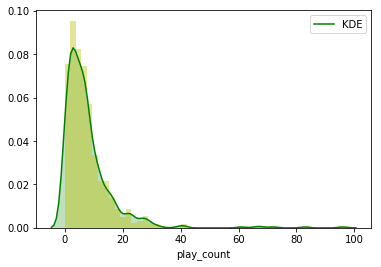

In [194]:
#集成了kernel denseity estimation KDE 和 hist
sbn.distplot(data_merge_pos["play_count"],kde_kws={"shade":True,"color": "g",  "label" : "KDE" },\
             hist_kws={"histtype": "stepfilled", "color": "y" })

In [195]:
data_merge.columns

Index(['user_id', 'create_time', 'love_count', 'comment_count', 'play_count',
       'content', 'age', 'vip_level'],
      dtype='object')

##### 构建xgboost

In [26]:
import xgboost as xgb
def upsite_down(y):
    w = np.zeros(y.shape, dtype=float)
    mask = y != 0
    w[mask] = 1./(y[mask]**2)
    return w
def rmspe(yhat, y):#根均方误差
    w = upsite_down(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe
def rmspe_xg(yhat, y):
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = upsite_down(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe
xgbmask=np.arange(data_merge.shape[0])
np.random.shuffle(xgbmask)#,data_merge.shape[0],replace=False)
data_xtrain=data_merge.ix[xgbmask[:int(xgbmask.shape[0]*0.7)],[1,2,3,5,6,7]]
data_ytrain=data_merge.ix[xgbmask[:int(xgbmask.shape[0]*0.7)],4]
data_xval=data_merge.ix[xgbmask[int(xgbmask.shape[0]*0.7):],[1,2,3,5,6,7]]
data_yval=data_merge.ix[xgbmask[int(xgbmask.shape[0]*0.7):],4]
data_ytrain=np.log(data_ytrain+1)
data_yval=np.log(data_yval+1)
dtrain=xgb.DMatrix(data_xtrain,data_ytrain)
dval=xgb.DMatrix(data_xval,data_yval)
watchlist=[(dtrain,"train"),(dval,"eval")]
params = {"objective": "reg:linear",
          "eta": 0.2,
          "max_depth": 10,
          "subsample": 0.5,
          "colsample_bytree": 0.7,
          "silent": 1,
          "max_leaf_nodes":5
          }
my_xgb=xgb.train(params,dtrain,num_boost_round=1000,
          evals=watchlist,
          #feval=rmspe_xg,
          verbose_eval=10)

[0]	train-rmse:2.62652	eval-rmse:2.63806
[10]	train-rmse:0.93522	eval-rmse:0.995191
[20]	train-rmse:0.848583	eval-rmse:0.951945
[30]	train-rmse:0.81547	eval-rmse:0.954242
[40]	train-rmse:0.783696	eval-rmse:0.957157
[50]	train-rmse:0.763917	eval-rmse:0.961936
[60]	train-rmse:0.743194	eval-rmse:0.967822
[70]	train-rmse:0.7243	eval-rmse:0.973602
[80]	train-rmse:0.703625	eval-rmse:0.97772
[90]	train-rmse:0.686295	eval-rmse:0.982037
[100]	train-rmse:0.66889	eval-rmse:0.984768
[110]	train-rmse:0.655464	eval-rmse:0.989162
[120]	train-rmse:0.640841	eval-rmse:0.991379
[130]	train-rmse:0.628183	eval-rmse:0.995302
[140]	train-rmse:0.61568	eval-rmse:0.997701
[150]	train-rmse:0.605573	eval-rmse:1.00313
[160]	train-rmse:0.596365	eval-rmse:1.00456
[170]	train-rmse:0.582724	eval-rmse:1.00895
[180]	train-rmse:0.56871	eval-rmse:1.01122
[190]	train-rmse:0.557867	eval-rmse:1.01331
[200]	train-rmse:0.551311	eval-rmse:1.01598
[210]	train-rmse:0.545241	eval-rmse:1.01646
[220]	train-rmse:0.536759	eval-rmse:1.

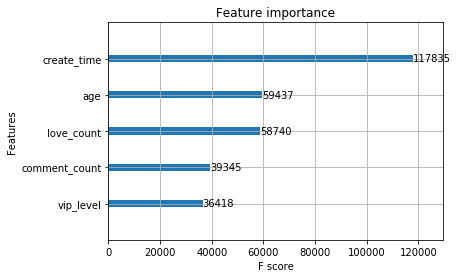

In [28]:
#xgb.plot_tree(my_xgb)
xgb.plot_importance(my_xgb)
#xgb的效果也不好

In [196]:
help(xgb.train)

Help on function train in module xgboost.training:

train(params, dtrain, num_boost_round=10, evals=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, evals_result=None, verbose_eval=True, xgb_model=None, callbacks=None, learning_rates=None)
    Train a booster with given parameters.
    
    Parameters
    ----------
    params : dict
        Booster params.
    dtrain : DMatrix
        Data to be trained.
    num_boost_round: int
        Number of boosting iterations.
    evals: list of pairs (DMatrix, string)
        List of items to be evaluated during training, this allows user to watch
        performance on the validation set.
    obj : function
        Customized objective function.
    feval : function
        Customized evaluation function.
    maximize : bool
        Whether to maximize feval.
    early_stopping_rounds: int
        Activates early stopping. Validation error needs to decrease at least
        every <early_stopping_rounds> round(s) to contin

In [14]:
import weka

##### 构建的逻辑回归和线性回归

In [137]:
#构建多项式线性回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt
import time
poly = PolynomialFeatures(degree=3)
tic=time.time()
#分割样本
mask=np.random.choice(np.arange(data_dongtai_sub.shape[0]),size=data_dongtai_sub.shape[0],replace=False)
mask_train=mask[:int(data_dongtai_sub.shape[0]*0.7)]
mask_test=mask[int(data_dongtai_sub.shape[0]*0.7):]
x_=np.array(data_dongtai_sub.ix[:,['create_time','love_count','comment_count','content']])
x_mean=np.mean(x_,1,keepdims=True)
x_std=np.std(x_,1,keepdims=True)
x_=(x_-x_mean)/x_std
x_train=np.array(data_dongtai_sub.ix[:,['create_time','love_count','comment_count','content']])[mask_train]
y_train=np.array(data_dongtai_sub.ix[:,['play_count']])[mask_train]
x_test=np.array(data_dongtai_sub.ix[:,['create_time','love_count','comment_count','content']])[mask_test]
y_test=np.array(data_dongtai_sub.ix[:,['play_count']])[mask_test]
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
########################################
rand=np.random.randn(y_test.shape[0])
scores=[]
residuals=[]
trainNum=x_train.shape[0]
#做minibatch 训练
for i in [1]:
    lr_model=lr(normalize=True)
    for j in range(i):
        new_mask=np.random.choice(np.arange(x_train_poly.shape[0]),size=x_train_poly.shape[0],replace=False)
        xx=x_train_poly[new_mask[int(j/i*trainNum):int((j+1)/i*trainNum)]]
        yy=y_train[new_mask[int(j/i*trainNum):int((j+1)/i*trainNum)]]
        lr.fit(lr_model,xx,yy)
    relativeResValue=(lr.predict(lr_model,x_test_poly)-y_test)/(y_test+rand)
    relativeResValue=np.clip(relativeResValue,-6,6)
    residuals.append(np.mean(np.abs(relativeResValue)))
    scores.append(lr.score(lr_model,x_test_poly,y_test)) 
print("times we used ",time.time()-tic)
print(scores)

times we used  1.2232778072357178
[0.41685904826282827]


In [138]:
joblib.dump(lr_model,'degree_3.model')

['degree_3.model']

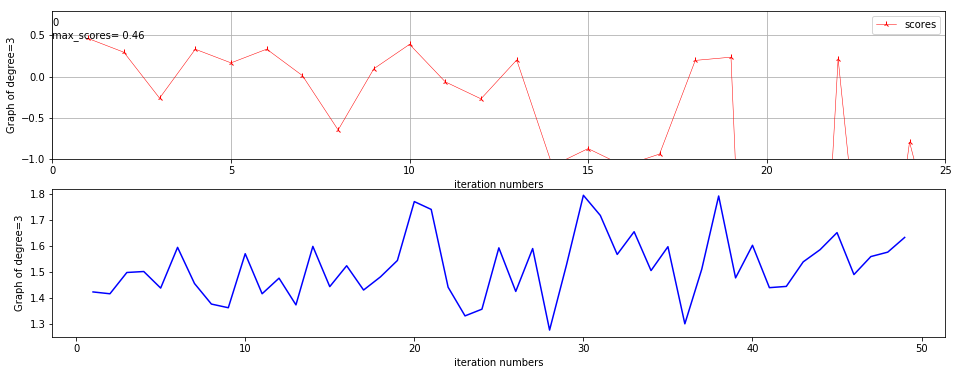

In [125]:
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)

plt.plot(np.arange(1,len(scores)+1),scores,color='r',linestyle='-',marker='2',label='scores',linewidth=0.5)
plt.xlabel("iteration numbers")
plt.ylabel('Graph of degree=3')
plt.axis([0,25,-1,0.8])
plt.legend(loc='best')
plt.text(np.argsort(scores)[-1], np.max(scores), '{}\nmax_scores= {}'.format(np.argsort(scores)[-1], np.around(np.max(scores),2)))
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.arange(1,len(scores)+1),residuals,color='b',label='residuals')
plt.xlabel("iteration numbers")
plt.ylabel('Graph of degree=3')
#plt.legend(loc='best')
plt.show()
#print("scores ",scores)

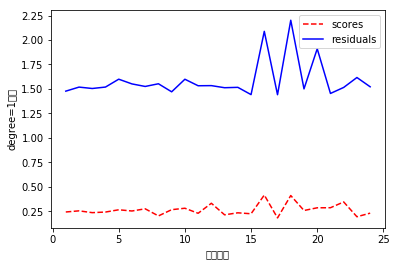

scores  [0.2439618977005007, 0.2556323696392727, 0.23717466352174846, 0.24337003598164586, 0.2665321874316833, 0.25411547115274713, 0.2764267023800716, 0.20384046219461383, 0.2676258908959548, 0.2821959120737123, 0.2307890126081854, 0.33302471487067775, 0.21495821333582235, 0.23561192488097935, 0.22580973385723638, 0.41689354084450925, 0.18342258979223924, 0.41183563662956324, 0.25920441969283503, 0.2868060879103983, 0.28744391651068657, 0.3464865658397215, 0.19546468747240597, 0.23203212547927876]


In [73]:
#degree=1的图
plt.plot(np.arange(1,len(scores)+1),scores,color='r',linestyle='dashed',label='scores')
plt.plot(np.arange(1,len(scores)+1),residuals,color='b',label='residuals')
plt.xlabel("迭代次数")
plt.ylabel('degree=1的图')
plt.legend(loc='best')
plt.show()
print("scores ",scores)

##### 线性回归

In [44]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression as lr1
import time
tic=time.time()
lr_=lr(normalize=True)
def linear_reg(data_merge,lr_,test_set_return=True):
    x=[]
    mask=np.random.choice(np.arange(data_merge.shape[0]),size=data_merge.shape[0],replace=False)
    mask_train=mask[:int(data_merge.shape[0]*0.7)]
    mask_test=mask[int(data_merge.shape[0]*0.7):]
    for i in [1]:
        x.append(data_merge.ix[:,i])
        x.append((data_merge.ix[:,i])**2)
        x.append((data_merge.ix[:,i])**3)
    for i in [2,3,5]:
        x.append(data_merge.ix[:,i])
        x.append(data_merge.ix[:,i]**2)
        x.append(data_merge.ix[:,i]**3)
    #x=np.array([data_merge[1],data_merge[2],data_merge[3],data_merge[5],data_merge[6],data_merge[7]])
    x=np.array(x).transpose()
    y=data_merge['play_count']
    y=np.array(y)
    x_train=x[mask_train]
    x_test=x[mask_test]
    y_train=y[mask_train]
    y_test=y[mask_test]
    lr.fit(lr_,X=x_train,y=y_train)
    if test_set_return:
        return lr_,x_test,y_test
    else:
        return lr_
lr_,x_test,y_test=linear_reg(data_dongtai_sub,lr_)
for i in range(5):
    lr_=linear_reg(data_dongtai_sub,lr_,False)
    print(lr.score(lr_,x_test,y_test))
#joblib.dump(lr_, 'lr.model')
toc=time.time()
print("times:",toc-tic)

0.2672392577649376
0.2523748779755002
0.26923640631972845
0.2565724800411111
0.240907469656781
times: 0.19952940940856934


In [239]:
import matplotlib.pyplot as plt
%matplotlib inline
rand=np.random.randn(y_test.shape[0])
relativeResValue=(lr.predict(lr_model,x_test_poly)-y_test)/(y_test+rand)
relativeResValue=np.clip(relativeResValue,-6,6)
#relativeResValue1=(lr1.predict(lr1_,x)-y)/(y+rand)
plt.plot(relativeResValue,'green')
#plt.plot(lr.predict(lr_,x),'green')
#plt.plot(data_merge.ix[:,'love_count'],'red')
plt.show()
print('mean_residual',np.mean(np.abs(relativeResValue)))
print('scores',lr.score(lr_model,x_test_poly,y_test))

KeyboardInterrupt: 

##### 逻辑回归

In [25]:
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression as lr1
import time
tic=time.time()
lr1_=lr1()
def logit_reg(data_merge_pos,data_merge_neg,lr_):
    x=[]
    mask_neg=np.random.choice(np.arange(data_merge_neg.shape[0]),size=data_merge_pos.shape[0],replace=False)
    train_neg=np.array(data_merge_neg.ix[mask_neg,1:])
    train=np.vstack([train_neg,np.array(data_merge_pos.ix[:,1:])])
    y=np.zeros(train.shape[0])
    y[train_neg.shape[0]:]=1
    mask=np.arange(train.shape[0])
    np.random.shuffle(mask)
    x_train=train[mask[:int(0.7*mask.shape[0])]]
    x_test=train[mask[int(0.7*mask.shape[0])]:]
    y_train=y[mask[:int(0.7*mask.shape[0])]]
    y_test=y[mask[int(0.7*mask.shape[0])]:]
    lr1.fit(lr_,X=x_train,y=y_train)
    y_hat=lr1.predict(lr1_,x_test)
    #print(lr1.score(lr1_,x_test,y_test))
    print("准确率 :",1-np.mean(np.abs(y_hat-y_test)))
#lr1_,x_test,y_test=logit_reg(data_merge_pos,data_merge_neg,lr1_)
for i in range(15):
    logit_reg(data_merge_pos,data_merge_neg,lr1_)
    #print(lr1.score(lr1_,x_test,y_test))
#joblib.dump(lr_, 'lr.model')
toc=time.time()
print("times:",toc-tic)
#根据产品挑选出来的正负样本，分类效果还不错

准确率 : 0.9141104294478528
准确率 : 0.8760233918128655
准确率 : 0.9401709401709402
准确率 : 0.8776844070961718
准确率 : 0.8767676767676768
准确率 : 0.9165487977369166
准确率 : 0.8538812785388128
准确率 : 0.8887804878048781
准确率 : 0.905511811023622
准确率 : 0.9065934065934066
准确率 : 0.8987341772151899
准确率 : 0.8940568475452196
准确率 : 0.9143426294820717
准确率 : 0.9258741258741259
准确率 : 0.8723584108199492
times: 0.07720541954040527


In [54]:
x=[]
mask_neg=np.random.choice(np.arange(data_merge_neg.shape[0]),size=data_merge_pos.shape[0],replace=False)
train_neg=np.array(data_merge_neg.ix[mask_neg,1:])
train=np.vstack([train_neg,np.array(data_merge_pos.ix[:,1:])])
y=np.zeros(train.shape[0])
y[train_neg.shape[0]:]=1
mask=np.arange(train.shape[0])
np.random.shuffle(mask)
x_train=train[mask[:int(0.7*mask.shape[0])]]
x_test=train[mask[int(0.7*mask.shape[0]):]]
y_train=y[mask[:int(0.7*mask.shape[0])]]
y_test=y[mask[int(0.7*mask.shape[0]):]]
lr1.fit(lr1_,X=x_train,y=y_train)
y_hat=lr1.predict(lr1_,x_test)
print(lr1.score(lr1_,x_test,y_test))
print("准确率 :",1-np.mean(np.abs(y_hat-y_test)))
print("y",y_test[:20])
print("y_hat",y_hat[:20])
#print("diff_abs",np.abs(y_hat-y_test)[20])

0.8698979591836735
准确率 : 0.8698979591836735
y [1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
y_hat [1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]


In [55]:
joblib.dump(lr1_,'logistic_reg.model')

['logistic_reg.model']

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
rand=np.random.randn(y_test.shape[0])
relativeResValue=(lr.predict(lr_model,x_test_poly)-y_test)/(y_test+rand)
relativeResValue=np.clip(relativeResValue,-6,6)
#relativeResValue1=(lr1.predict(lr1_,x)-y)/(y+rand)
plt.plot(relativeResValue,'green')
#plt.plot(lr.predict(lr_,x),'green')
#plt.plot(data_merge.ix[:,'love_count'],'red')
plt.show()
print('mean_residual',np.mean(np.abs(relativeResValue)))
print('scores',lr.score(lr_model,x_test_poly,y_test))

NameError: name 'lr' is not defined

In [22]:
#按照播放量选取分离正负样本！！！
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression as lr1
import time
tic=time.time()
lr1_=lr1()
pos_index=[i for i in range(dongtai_wanghao['play_count'].shape[0]) if dongtai_wanghao.ix[i,'play_count']>80]
neg_index=[i for i in range(dongtai_wanghao['play_count'].shape[0]) if dongtai_wanghao.ix[i,'play_count']<=80]
#pos_index.shape
train_pos=np.array(dongtai_wanghao.reindex(pos_index))
train_neg=np.array(dongtai_wanghao.reindex(neg_index))
###############################################################################################
train=np.vstack([train_neg,train_pos])

train=train[:,[2,3,4,5,6,7,8,9,10,11,13,14,15,17,18]]
#归一化处理
train=preprocessing.normalize(train,norm='l2')

y=np.zeros(train.shape[0])
y[train_neg.shape[0]:]=1
mask=np.arange(train.shape[0])
np.random.shuffle(mask)
x_train=train[mask[:int(0.7*mask.shape[0])]]
x_test=train[mask[int(0.7*mask.shape[0]):]]
y_train=y[mask[:int(0.7*mask.shape[0])]]
y_test=y[mask[int(0.7*mask.shape[0]):]]

(17916, 15)
(17916,)


In [23]:
lr1.fit(lr1_,X=x_train,y=y_train)
y_hat=lr1.predict(lr1_,x_test)
#print(lr1.score(lr1_,x_test,y_test))
print("准确率 :",1-np.mean(np.abs(y_hat-y_test)))
print("y    ",y_test[:20])
print("y_hat",y_hat[:20])
toc=time.time()
print("times to compute ",toc-tic)
#以播放量分割的正负样本集，准确率小了许多，因为我们不能使用播放量分类，损失了一部分信息

准确率 : 0.6847245735121761
y     [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.]
y_hat [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]
times to compute  17.448786735534668


##### 聚类分析

In [291]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pos=np.array(data_merge_pos.ix[:,1:])
neg=np.array(data_merge_neg.ix[:,1:])
posNum=pos.shape[0]
negNum=neg.shape[0]
#归一化处理！！！
mean_pos=np.mean(pos,1,keepdims=True)
std_pos=np.std(pos,1,keepdims=True)
mean_neg=np.mean(neg,1,keepdims=True)
std_neg=np.std(neg,1,keepdims=True)
norm_pos=(pos-mean_pos)/std_pos
norm_neg=(neg-mean_neg)/std_neg
norm_neg=np.clip(norm_neg,-2,2)
norm_pos=np.clip(norm_pos,-2,2)
#PCA 处理
pca=PCA(n_components=2)
pca_neg=pca.fit_transform(norm_neg)
#print(np.sum(pca.explained_variance_ratio_))
pca_pos=pca.fit_transform(norm_pos)
#聚类&可视化
all_data=np.vstack((pca_neg,pca_pos))
mask=np.random.choice(np.arange(all_data.shape[0]),replace=False,size=all_data.shape[0])
#plt.scatter(pca_neg[:,1],pca_neg[:,0])
#plt.scatter(all_data[mask[:500],0],all_data[mask[:500],1],)
#plt.show()
#for i in mask[:50]:
#    plt.scatter(all_data[i,0],all_data[i,1])

In [316]:
from sklearn.metrics import roc_curve
kmeans=KMeans(n_clusters=2).fit(all_data[-2000:])
labels=np.array(kmeans.labels_,dtype=bool)
correct_labels=np.zeros(2000,dtype=bool)
correct_labels[-posNum:]=1
class_color=np.array(['b']*correct_labels.shape[0])
class_color[correct_labels]='r'
label_color=np.array(['b']*correct_labels.shape[0])
label_color[labels]='r'
roc_curve(labels,correct_labels)
#print(labels[-50:])
#print(kmeans.fit_predict(all_data)[:50] )
#print(kmeans.fit_predict(all_data)[-50:] )

[ True False  True  True  True False  True  True  True False False  True
  True  True False False False False False False  True  True  True False
 False False False False False False False False False False False False
 False False  True False False False False False False  True False  True
  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


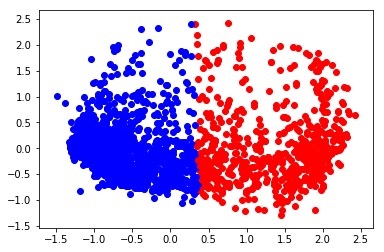

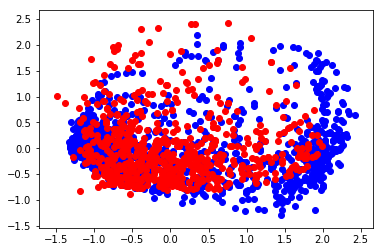

In [320]:
#可视化处理
for i in np.arange(2000):
    plt.scatter(all_data[-2000:][i,0],all_data[-2000:][i,1],c=label_color[i])
plt.show()
for i in np.arange(2000):
    plt.scatter(all_data[-2000:][i,0],all_data[-2000:][i,1],c=class_color[i])
plt.show()

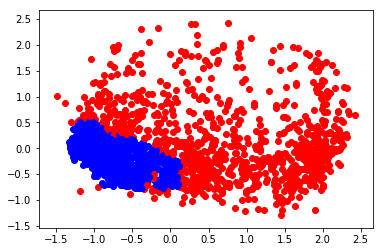

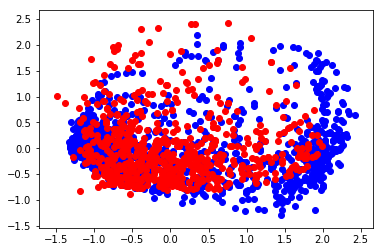

In [344]:
#dbscan聚类算法
from sklearn.cluster import dbscan
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.1,min_samples=16).fit(all_data[-2000:])
labels=np.array(db.labels_,dtype=bool)
correct_labels=np.zeros(2000,dtype=bool)
correct_labels[-posNum:]=1
class_color=np.array(['b']*correct_labels.shape[0])
class_color[correct_labels]='r'
label_color=np.array(['b']*correct_labels.shape[0])
label_color[labels]='r'
#可视化处理
for i in np.arange(2000):
    plt.scatter(all_data[-2000:][i,0],all_data[-2000:][i,1],c=label_color[i])
plt.show()
for i in np.arange(2000):
    plt.scatter(all_data[-2000:][i,0],all_data[-2000:][i,1],c=class_color[i])
plt.show()

In [342]:
#高斯混合聚类算法
from sklearn.mixture import  GaussianMixture
db=GaussianMixture(n_components=2).fit(all_data[-2000:])
labels=np.array(db.predict)
print(db.bic(all_data[-2000:]))

7938.30572021916


In [171]:
correct_labels=np.zeros(2000,dtype=bool)
correct_labels[-posNum:]=1
class_color=np.array(['b']*correct_labels.shape[0])
class_color[correct_labels]='r'
label_color=np.array(['b']*correct_labels.shape[0])
label_color[labels]='r'
#可视化处理
for i in np.arange(2000):
    plt.scatter(all_data[-2000:][i,0],all_data[-2000:][i,1],c=label_color[i])
plt.show()
for i in np.arange(2000):
    plt.scatter(all_data[-2000:][i,0],all_data[-2000:][i,1],c=class_color[i])
plt.show()

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

##### 试验场！

In [ ]:
df1=pd.DataFrame({'key1':['b','b','a','c','a','a','b'],
                 'data1':range(7)})
df2=pd.DataFrame({'key1':['a','b','d'],
                 'data2':range(3)})
df3=pd.DataFrame({'key2':['a','b','d'],
                 'data2':range(3)})

In [14]:
dongtai_id_concat

,id
0,160893444305190912
1,160533864744222720
2,160167721646948352
3,159812428631113728
4,159446420795949056
5,159086934189146112
6,159086934189146112
7,158362339442163712
8,157981780861779968
9,157628465615470592


In [13]:
data_merge_neg[:20]

,user_id,create_time,love_count,comment_count,play_count,content,age,vip_level
0,5059263317283f15fa514511d4a7aae8,1.491912,6.0,0.0,63.0,9.0,20.0,0.0
1,5059263317283f15fa514511d4a7aae8,1.501749,7.0,0.0,24.0,9.0,20.0,0.0
2,5059263317283f15fa514511d4a7aae8,1.491641,1.0,0.0,16.0,9.0,20.0,0.0
3,5059263317283f15fa514511d4a7aae8,1.491641,2.0,0.0,19.0,9.0,20.0,0.0
4,5059263317283f15fa514511d4a7aae8,1.491912,4.0,0.0,41.0,9.0,20.0,0.0
5,5059263317283f15fa514511d4a7aae8,1.491728,1.0,0.0,12.0,9.0,20.0,0.0
6,5059263317283f15fa514511d4a7aae8,1.491814,6.0,0.0,40.0,9.0,20.0,0.0
7,5059263317283f15fa514511d4a7aae8,1.491641,2.0,0.0,17.0,9.0,20.0,0.0
8,5059263317283f15fa514511d4a7aae8,1.491802,0.0,0.0,23.0,9.0,20.0,0.0
9,5059263317283f15fa514511d4a7aae8,1.491802,1.0,0.0,17.0,9.0,20.0,0.0


In [ ]:
c=np.random.random([10,1])
b=tf.nn.embedding_lookup(c,[1,3])
sess=tf.Session()
sess.run(tf.initialize_all_variables())
print(sess.run(b))
print(c)

In [17]:
a = np.arange(8).reshape(2, 4)
b = np.arange(8, 16).reshape(2, 4)
c = np.arange(12, 20).reshape(2, 4)

print(a)
print(b)
print(c)

a = tf.Variable(a, dtype=tf.float32)
b = tf.Variable(b, dtype=tf.float32)
c = tf.Variable(c, dtype=tf.float32)
init=tf.initialize_all_variables()
idx = tf.SparseTensor(indices=[[0,0], [0,2], [1,0], [1, 1]], values=[1,2,2,0], dense_shape=(2,2))
result = tf.nn.embedding_lookup_sparse((a,c,b), idx, None, combiner="sum")
sess.run(init)
sess.run(result)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]
[[12 13 14 15]
 [16 17 18 19]]


array([[[20., 22., 24., 26.],
        [28., 30., 32., 34.]],

       [[ 8., 10., 12., 14.],
        [16., 18., 20., 22.]]], dtype=float32)

##### 决策树构造

In [64]:
from math import log
def createDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels
def calcShannonEnt(dataSet):
    countDataSet = len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[bb[5]]#以点赞数量作为标签！
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    print(labelCounts) 
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/countDataSet
        shannonEnt -= prob * log(prob,2)
    return shannonEnt
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet
def chooseBestFeatureToSplit(dataSet):
    featDict={}
    numFeatures = len(dataSet[0])
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain =0.0
    bestFeature = -1

    for i in range(numFeatures):
        featList = [sample[i] for sample in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        featDict[i]=infoGain
#        if(infoGain > bestInfoGain):
#            bestInfoGain = infoGain
#            bestFeature = i
    return featDict,sorted(featDict)

0      6.0
1      6.0
2      4.0
3      6.0
4      3.0
5      3.0
6      5.0
7      2.0
8      1.0
9     14.0
10    14.0
11     4.0
12     6.0
13     7.0
14     5.0
15    10.0
16    32.0
17     8.0
18     7.0
19     3.0
20     6.0
21     1.0
22     6.0
23     6.0
24     7.0
25     6.0
26     2.0
27     5.0
28     4.0
29     4.0
Name: 5.love_count, dtype: float64

In [44]:
import pandas as pd
import numpy as np
import sklearn as sl

In [45]:
from sklearn import tree
x=[[0,0],[1,1]]
y=[0,1]
clf=tree.DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [3]:
import numpy as np
ii=np.array([[1,2],[3,4]])
jj=np.array([[14,3],[2,5]])
np.sqrt(np.sum(ii*ii))

5.477225575051661

##### 我创建的表格

In [ ]:
dongtai_wanghao=pd.csv("")

In [ ]:
from multiprocessing import Pool
def f(index):
    return index**2
groups=[x for x in range(6)]
pool=Pool()
pool.map(f,groups)